<a href="https://colab.research.google.com/github/ika-si/AI-Fri45/blob/main/search_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pythonで迷路（＝グラフ）探索アルゴリズムを実装する

## 2. 幅優先探索編

### 2-0. Google Colab のファイルを手元にコピーする
- この文を読めている時点でアクセスには成功している。
- 自身のGoogleドライブ上の好きな場所にこのファイルのコピーを作成しよう。
- 自身のローカルで実行していっても良いが、基本的にはGoogle Colabで進めることを想定している。

### 2-1. 幅優先探索（BFS; Breath First Search）の関数と前準備
- 以下のコードは幅優先検索の関数BFSを中身がカラの状態で宣言したものである。
- **実は、DFSの実装を頑張った皆であれば、BFSはすぐに実装できる。**
- **2. 幅優先探索編 の最終課題：BFSを完成させて実行してみよう。**
  - 関数BFSを完成させて、実際に幅優先探索でスタートからゴールまで探索させよう。
  - 今までの講義と演習を理解していれば、作業はすぐに終了する。落ち着いて振り返ってみよう。
    - ヒント：幅優先探索と深さ優先探索のアルゴリズムはどれくらい違うものだったか。どこに違いがあったか。
- **実行結果として、幅優先探索で訪問したリストの順序が講義での例と同じになったらTAに見せること（誰か1名でよい）。以上で今回の演習は終了となる。時間が余ったら、以下の3.加点課題：DFSのもう一つの実装方法に取り組んでも良い。**

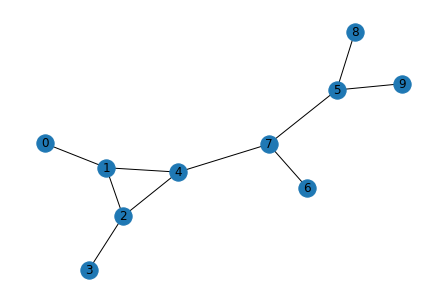

Following is Depth First Traversal (starting from vertex 0)
0 1 4 7 6 5 8 9 

Following is Breadth First Traversal (starting from vertex 0)


In [1]:
from collections import defaultdict 
import matplotlib.pyplot as plt
import networkx as nx

# 迷路をグラフとして保持するクラス
class Graph: 
  
    # コンストラクタ（クラスを初期化する） 
    def __init__(self): 
  
        # pythonのcollectionsから辞書型の変数を宣言し、このクラスのメンバ変数として定義
        self.graph = defaultdict(list) 
  
    # u番目のノードとv番目のノードの間に双方向のエッジを張る
    def addEdge(self, u, v): 
        self.graph[u].append(v) 
        self.graph[v].append(u) 

    # Depth First Search (深さ優先探索) でoriginノードからdestinationノードまで探索 
    def DFS(self, o, d): 
  
        # ノードそれぞれを訪問したことがあるかを示すリスト
        # 最初は全て訪問したことがないので False のみ 
        visited = [False] * (len(self.graph)) 
  
        # オープンリスト
        queue = [] 
  
        # オープンリストの要素第1号としてスタート地点を追加
        queue.append(o) 
        # スタート地点を訪問済みにする
        visited[o] = True
  
        # queueが空でない限りループ  
        while queue: 
  
            # オープンリストの先頭のノードを抜き出す
            s = queue.pop(0) 
            # クローズドリストに追加する代わりに辿った順序を出力していく
            print (s, end = " ") 
            # 目的地を出力した時点で終了
            if s == d:
                print ("\n")
                return
  
            # 👆で抜き出されたノードから繋がっているノードを調べていく
            subqueue = []
            for i in self.graph[s]: 
                # まだ訪れたことの無いノードをサブのオープンリストに追加
                # オープンリストに加えた時点で訪問済みとする
                if visited[i] == False:
                    subqueue.append(i) 
                    visited[i] = True
            # サブのオープンリストを本体のオープンリストの「先頭」に追加
            queue = subqueue + queue 
  
    # Breath First Search (幅優先探索) でoriginノードからdestinationノードまで探索 
    def BFS(self, o, d): # 2-1.で完成させるべき関数
        # ノードそれぞれを訪問したことがあるかを示すリスト
        # 最初は全て訪問したことがないので False のみ 
        visited = [False] * (len(self.graph)) 
  
        # オープンリスト
        queue = [] 
  
        # オープンリストの要素第1号としてスタート地点を追加
        queue.append(o) 
        # スタート地点を訪問済みにする
        visited[o] = True
  
        # queueが空でない限りループ  
        while queue: 
  
            # オープンリストの先頭のノードを抜き出す
            s = queue.pop(0) 
            # クローズドリストに追加する代わりに辿った順序を出力していく
            print (s, end = " ") 
            # 目的地を出力した時点で終了
            if s == d:
                print ("\n")
                return
  
            # 👆で抜き出されたノードから繋がっているノードを調べていく
            subqueue = []
            for i in self.graph[s]: 
                # まだ訪れたことの無いノードをサブのオープンリストに追加
                # オープンリストに加えた時点で訪問済みとする
                if visited[i] == False:
                    subqueue.append(i) 
                    visited[i] = True
            # サブのオープンリストを本体のオープンリストの「先頭」に追加
            queue = subqueue + queue 

  
if __name__ == "__main__":
  
    # グラフを作成する
    # 講義で表示されているとおりのグラフをここで作成する 
    # (Sを0、Gを9とし、その他のノードは番号通り1から8までとする)
    g = Graph() 
    g.addEdge(0, 1)
    g.addEdge(1, 4)
    g.addEdge(1, 2)
    g.addEdge(2, 3)
    g.addEdge(2, 4)
    g.addEdge(4, 7)
    g.addEdge(7, 6)
    g.addEdge(7, 5)
    g.addEdge(5, 8)
    g.addEdge(5, 9)

    # グラフの図示にはnetworkxを用いる
    # 上記で作成したGraphクラスのインスタンスにあるメンバ変数のgraphをnetworkxのグラフ表現に変換して表示
    nx.draw(nx.convert.to_networkx_graph(g.graph), with_labels=True)
    plt.show()

    # 深さ優先探索の実行
    print ("Following is Depth First Traversal (starting from vertex 0)") 
    g.DFS(0,9)

    # 幅優先探索の実行
    print ("Following is Breadth First Traversal (starting from vertex 0)") 
    g.BFS(0,9)





### 3. 加点課題：DFSのもう一つの実装方法
- 実は、DFSはもっと短いコードで実装できる。
- 以下はその一例である。表示するためのコードやコメントが無いせいもあるが、とても短くなっているのがわかる。
  - ただし、短くは書けるが可読性は落ちている。
  - 一部のアルゴリズムを実装する際に頻繁に用いられるテクニックが入っている。
- **加点課題：このコードでどのようにしてDFSが実現されるのかを言葉で説明せよ。**
  - 自由なフォーマットで作文しても良いし、コードに対して詳細なコメントを入れていく方式でも良い。
  - プログラミングとしてどのようなテクニックが用いられているかも明らかにすること。
  - この課題の解答は ushiku@gm.tsuda.ac.jp 宛に「探索演習 加点課題：（氏名）」というタイトルで送付すること。
  - 基準以上の解答が出来た者には出席点0.5回分を加点する。


In [ ]:
graph = {
    'A' : ['B','C'],
    'B' : ['D', 'E'],
    'C' : ['F'],
    'D' : [],
    'E' : ['F'],
    'F' : []
}

visited = set()

def dfs(visited, graph, node):
    if node not in visited:
        print (node, end = " ")
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)

dfs(visited, graph, 'A')
